# Check Data Availability

In [1]:
import os
import glob

images_dir = os.path.join('../data/cell_images')
malaria_dir = os.path.join(images_dir,'Parasitized')
healthy_dir = os.path.join(images_dir,'Uninfected')

malaria_img = glob.glob(malaria_dir+'/*.png')
healthy_img = glob.glob(healthy_dir+'/*.png')

print('Malaria images : %d' %len(malaria_img))
print('Healthy images : %d' %len(healthy_img))

Malaria images : 13754
Healthy images : 13754


# Get a Fraction of Data and Labelling

In [2]:
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

data_frac = 0.5

df = pd.DataFrame({
    'img': malaria_img + healthy_img,
    'label': ['malaria']*len(malaria_img) + ['healthy']*len(healthy_img)
}).sample(frac=data_frac).reset_index(drop=True)

img_num = df.shape[0]

dim1 = []
dim2 = []

for i in range(img_num):
    dim1.append(cv2.imread(df.img[i]).shape[0])
    dim2.append(cv2.imread(df.img[i]).shape[1])
    
df['dim1'] = dim1
df['dim2'] = dim2

df

,img,label,dim1,dim2
0,../data/cell_images\Uninfected\C161P122ThinF_I...,healthy,118,115
1,../data/cell_images\Uninfected\C88P49ThinF_IMG...,healthy,112,106
2,../data/cell_images\Parasitized\C136P97ThinF_I...,malaria,118,136
3,../data/cell_images\Uninfected\C52P13thinF_IMG...,healthy,130,130
4,../data/cell_images\Uninfected\C185P146ThinF_I...,healthy,115,103
...,...,...,...,...
13749,../data/cell_images\Parasitized\C116P77ThinF_I...,malaria,127,121
13750,../data/cell_images\Uninfected\C64P25N_ThinF_I...,healthy,139,118
13751,../data/cell_images\Uninfected\C90P51ThinF_IMG...,healthy,133,115
13752,../data/cell_images\Uninfected\C91P52ThinF_IMG...,healthy,190,148


# Take a Look of Image

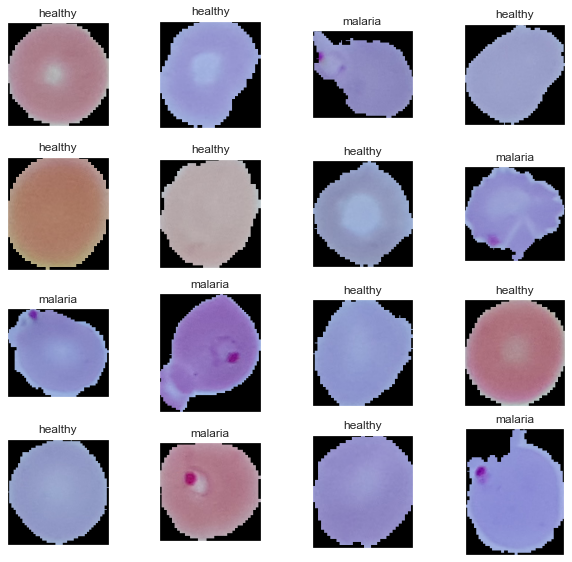

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

plt.figure(1, figsize=(10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace=0.1,wspace=0.5)
    plt.imshow(cv2.imread(df.img[i]))
    plt.title(df.label[i])
    plt.xticks([])
    plt.yticks([])

# Check Class Balance

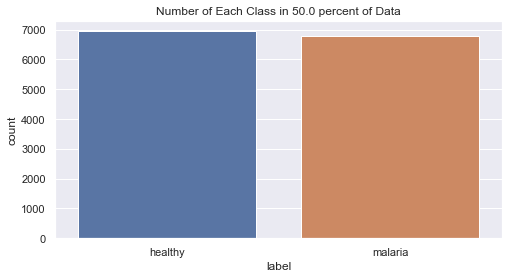

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=df)
plt.title('Number of Each Class in {0:.1f} percent of Data'.format(data_frac*100))

plt.show()

# Check Image Size Distribution

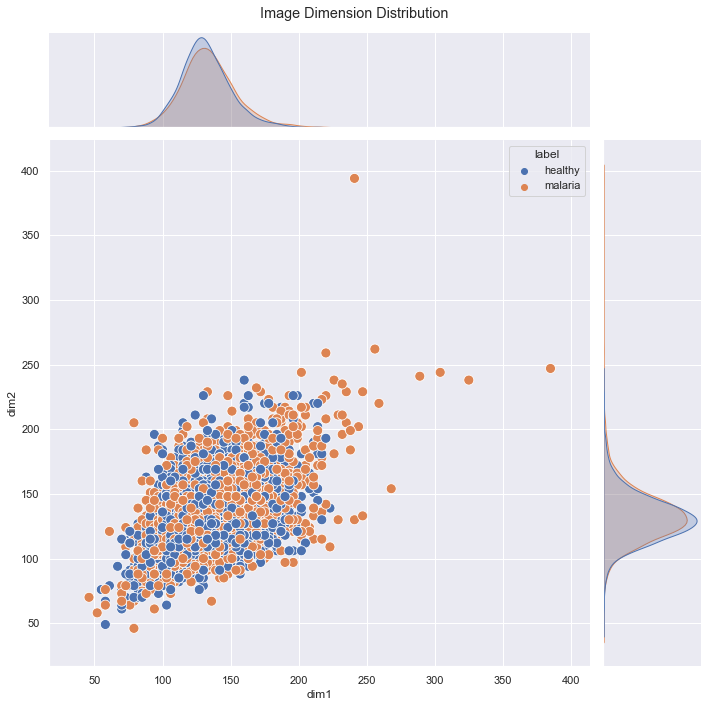

In [5]:
p = sns.jointplot(data=df,x='dim1',y='dim2', hue='label', s=100, height=10)
p.fig.suptitle("Image Dimension Distribution")
p.ax_joint.collections[0].set_alpha(1)
p.fig.tight_layout()


In [6]:
df.describe()

,dim1,dim2
count,13754.000000,13754.000000
mean,133.107096,132.612186
std,20.623625,19.959742
min,46.000000,46.000000
25%,121.000000,121.000000
50%,130.000000,130.000000
75%,145.000000,142.000000
max,385.000000,394.000000


As we can see from plot and statistic above, the first and second dimension of images are varied and normally distributed. We need to standardize the dimension by resizing the image. We choose (130,130) as new dimensions since it's close to median and mean value. 

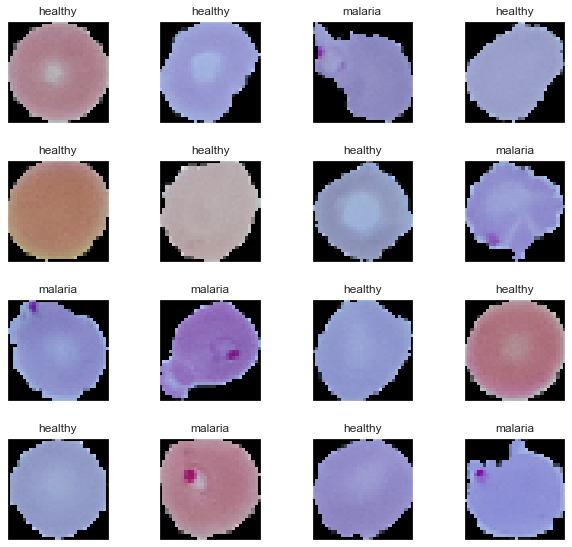

In [7]:
resize = (32,32)

plt.figure(1, figsize=(10,10))

for i in range(16):
    img = cv2.imread(df.img[i])
    img = cv2.resize(img, resize, interpolation = cv2.INTER_CUBIC)
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace=0.1,wspace=0.5)
    plt.imshow(img)
    plt.title(df.label[i])
    plt.xticks([])
    plt.yticks([])

# Save the Dataframe as Pickle for Next Step

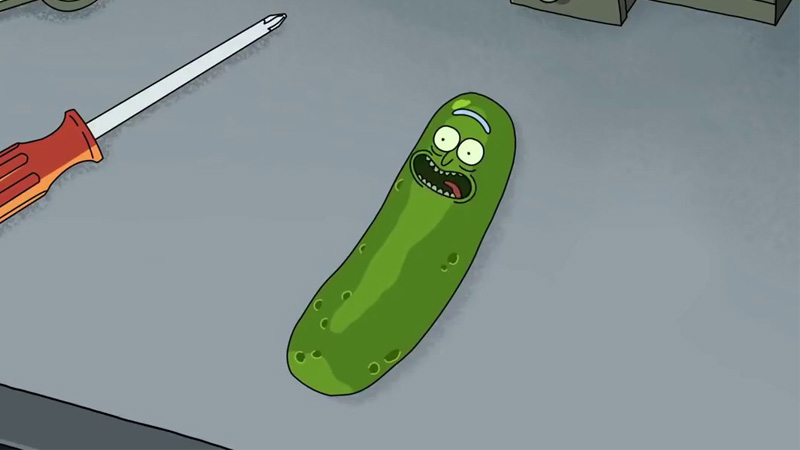

In [8]:
import pickle

dataframe_dir = os.path.join('../data')
with open(dataframe_dir+'/dataframe.pickle','wb') as f:
    pickle.dump(df, f)